With the increase in need for Developers around the world, 

In [ ]:
# import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# import the csv file
from google.colab import files
uploaded = files.upload()

Saving survey_results_public.csv to survey_results_public.csv


In [174]:
import io
df = pd.read_csv(io.BytesIO(uploaded['survey_results_public.csv']))
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [175]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [176]:
# from the above information, they are alot of columns which we dont need
# I only need Employment status, Country, YearsCodePro, Education level
# and salary. Therefore we would drop other columns
df = df[['Employment', 'Country', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]
df.head()

,Employment,Country,EdLevel,YearsCodePro,ConvertedCompYearly
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,62268.0
1,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
2,"Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
3,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN
4,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,NaN


In [177]:
df.tail()

,Employment,Country,EdLevel,YearsCodePro,ConvertedCompYearly
83434,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,160500.0
83435,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,3960.0
83436,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",4,90000.0
83437,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,816816.0
83438,Employed full-time,Brazil,"Professional degree (JD, MD, etc.)",4,21168.0


In [178]:
# convert ConvertedCompYearly name to Salary since thats the target function
df.head()
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head()

,Employment,Country,EdLevel,YearsCodePro,Salary
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,62268.0
1,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
2,"Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN
3,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN
4,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,NaN


In [179]:
df.isnull().sum()

Employment        116
Country             0
EdLevel           313
YearsCodePro    22223
Salary          36595
dtype: int64

In [180]:
# drop salary NAN values

df= df[df["Salary"].notnull()]
df.head()

,Employment,Country,EdLevel,YearsCodePro,Salary
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,62268.0
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0


In [181]:
# check information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employment    46831 non-null  object 
 1   Country       46844 non-null  object 
 2   EdLevel       46823 non-null  object 
 3   YearsCodePro  46391 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [182]:
# check number of missing values
# compare it with the number of non-missing values
df.isnull().sum()

Employment       13
Country           0
EdLevel          21
YearsCodePro    453
Salary            0
dtype: int64

In [183]:
# from above we notice that the number of missing values are few compared 
# to the number of non-missing values
# therefore i would drop them
df= df.dropna()
df

,Employment,Country,EdLevel,YearsCodePro,Salary
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0
...,...,...,...,...,...
83434,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,160500.0
83435,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,3960.0
83436,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",4,90000.0
83437,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,816816.0


In [184]:
# lets check them 
df.isnull().sum()


Employment      0
Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [185]:
# I would be dropping employment table
# since one has to be employed before one can get paid
df = df.drop('Employment', axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


# **Data Cleaning**

In [186]:
# clean country
df['Country'].value_counts()


United States of America                                9800
India                                                   3750
Germany                                                 3221
United Kingdom of Great Britain and Northern Ireland    2915
Canada                                                  1721
                                                        ... 
Dominica                                                   1
Saint Kitts and Nevis                                      1
Guinea                                                     1
Monaco                                                     1
North Korea                                                1
Name: Country, Length: 171, dtype: int64

In [187]:
# we can see some countries have very few representatives adn others have more
# group countries with range of number of developers together
def shorten_categories(categories, cutoff):
    categorical_map = {}
    # cutoff number we can play around with
    for i in range(len(categories)):
      # for country count_value equal or greater than the cutoff, keep
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
          # otherwise group them as 'Other'
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [188]:
country_map = shorten_categories(df.Country.value_counts(), 500)
df['Country']= df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   13931
United States of America                                 9800
India                                                    3750
Germany                                                  3221
United Kingdom of Great Britain and Northern Ireland     2915
Canada                                                   1721
France                                                   1619
Brazil                                                   1572
Poland                                                   1106
Netherlands                                              1052
Spain                                                    1027
Australia                                                 948
Italy                                                     917
Russian Federation                                        871
Sweden                                                    820
Switzerland                                               561
Turkey  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


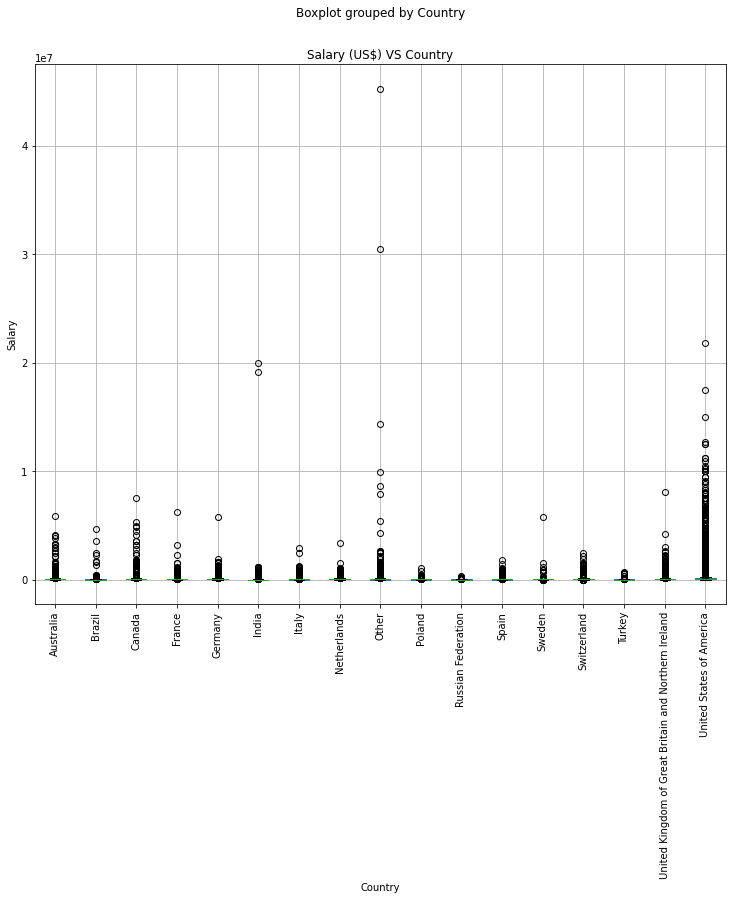

<Figure size 432x288 with 0 Axes>

In [189]:
# check salary range using boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

In [190]:
#Q3 is less than $500000 which is the median of upper half
# also the above plot shows the outliers start from below $100000
# and we want to get the median of the salary
# Salary less than or equal to $250000
df = df[df['Salary'] <= 250000]

# Salary greater than  or equal to $100000
df = df[df['Salary'] >= 100000]

# drop Others
df = df[df['Country'] != 'Other']


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


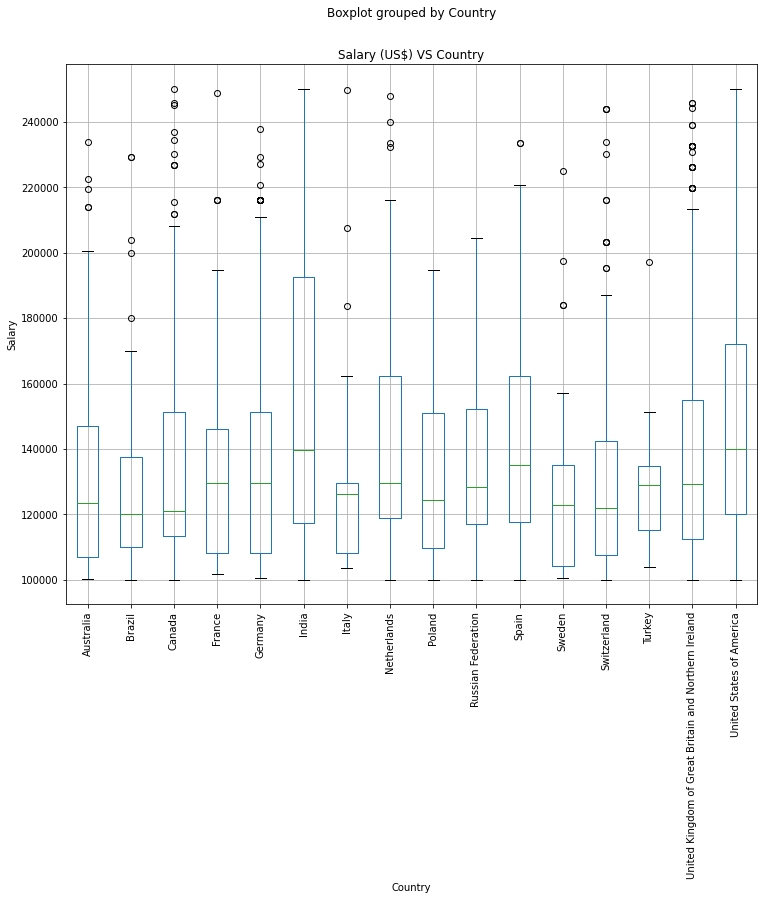

<Figure size 432x288 with 0 Axes>

In [191]:
# check salary range using boxplot
fig, ax = plt.subplots(1,1, figsize=(12, 10))
df.boxplot('Salary', 'Country', ax=ax)
plt.title('Salary (US$) VS Country')
plt.ylabel('Salary')
plt.xlabel('Country')
plt.xticks(rotation =90)
plt.show()
plt.tight_layout()

In [192]:
# clean YearsCodePro
df['YearsCodePro'].unique()

array(['Less than 1 year', '5', '18', '15', '8', '1', '10', '3', '26',
       '6', '16', '34', '24', '2', '14', '22', '7', '13', '31', '9', '12',
       '20', '23', '4', '35', '21', '19', '25', '11', '33', '30', '37',
       '27', '40', '28', '17', '32', '29', '44', '36', '42', '43', '38',
       '47', '45', 'More than 50 years', '39', '41', '49', '50', '48',
       '46'], dtype=object)

In [193]:
# change string values to numerical values
def cleanexperience(x):
  if x == 'More than 50 years':
    return 50
  else:
    x == 'Less than 1 year'
    return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(cleanexperience)


In [194]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [195]:
# clean Edlevel
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else'],
      dtype=object)

In [197]:
def clean_education(x):
  # keep Bachelor's degree
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
        # keep master's degree
    if 'Master’s degree' in x:
        return 'Master’s degree'
        # group doctorates and assign to Post grad
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [198]:
# check edlevel
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Post grad', 'Less than a Bachelors',
       'Master’s degree'], dtype=object)

In [199]:
# label encode education
# change strings to numerical form
# using labelencoder
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 3, 1, 2])

In [200]:
# label encode country
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([15, 14,  2,  7,  3, 12,  5,  4,  8,  1,  6, 11, 13,  9,  0, 10])

# **Train Data**

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [229]:
# input input/feature(x) and output/target(y)
X = df.drop('Salary', axis=1)
y = df['Salary']

In [230]:
# using the train_test_split method to train my x and y
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=40)
lg_reg = LinearRegression()


In [231]:
# fit my data and test the data
lg_reg.fit(X_train,y_train)
y_pred= lg_reg.predict(X_test)

# error
error= np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))


$36,142.42


In [232]:
# using the score() to find the Linear Regression Score
lg_reg.score(X_test,y_test)

0.013855101112408286

From the above score we see that Linear Regression is a bad model for this data. I would like to use the Decision Tree Regressor model to try to improve our results.

In [242]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [243]:
lg_pred = dec_tree_reg.predict(X_test)

In [244]:
# error
error = np.sqrt(mean_squared_error(y_test, lg_pred))
print("${:,.02f}".format(error))

$35,991.71


In [248]:
# check Decision Tree score
score = dec_tree_reg.score(X_test, y_test)
print(score)

0.02206192715859967


From the Decision Tree model, the error is still high. I would like to try another model Random Forest, which is very much similar to Decision Tree model.

In [250]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [251]:
ran_pred = random_forest_reg.predict(X_test)

In [252]:
# error
error = np.sqrt(mean_squared_error(y_test, ran_pred))
print("${:,.02f}".format(error))

$35,956.72


In [255]:
# check score
score = random_forest_reg.score(X_test, y_test)
print(score)

0.023962305563635655


The Random Forest model is still high. 

In [256]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [258]:
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
reg_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, reg_pred))
print("${:,.02f}".format(error))

$35,799.48


In [259]:
score = regressor.score(X_test, y_test)
print(score)

0.03248036675021193


GridSearch gave a better result amongst every other model used here. 


In [260]:
X

,Country,EdLevel,YearsCodePro
36,15,0,0.5
62,15,0,0.5
69,14,0,0.5
75,15,0,0.5
77,2,3,0.5
...,...,...,...
83387,2,1,0.5
83389,15,0,0.5
83424,4,0,0.5
83430,15,2,0.5


In [266]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [267]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[15.,  2., 15.]])

In [268]:
reg_pred = regressor.predict(X)
reg_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([152876.02647658])

In [269]:
import pickle

In [270]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)


In [271]:

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [272]:
reg_pred = regressor_loaded.predict(X)
reg_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([152876.02647658])